## New York City Taxi Trip Duration

En esta competencia, Kaggle reta a construir un modelo que prediga la duración total de los viajes en taxi en la ciudad de Nueva York. Su conjunto de datos primario es publicado por la Comisión de taxis y limusinas de la ciudad de Nueva York, que incluye el tiempo de recogida, las coordenadas geográficas, el número de pasajeros y varias otras variables.

NOTA: Los datos fueron muestreados y limpiados para los propósitos de la competencia. Con base en los atributos de viaje individuales, los participantes deben predecir la duración de cada viaje en el conjunto de prueba.

##### File descriptions 

* train.csv - the training set (contains 1.458.644 trip records) 

* test.csv - the testing set (contains 625.134 trip records) 

* sample_submission.csv  - a sample submission file in the correct format 

* train_enriched.csv (contains 58.345 enriched trip records)

* test_enriched.csv (contains 24.055 enriched trip records)

##### Data fields 

* id - a unique identifier for each trip 

* vendor_id - a code indicating the provider associated with the trip record 

* pickup_datetime - date and time when the meter was engaged 

* dropoff_datetime - date and time when the meter was disengaged 

* passenger_count - the number of passengers in the vehicle (driver entered value) 

* pickup_longitude - the longitude where the meter was engaged 

* pickup_latitude - the latitude where the meter was engaged 

* dropoff_longitude - the longitude where the meter was disengaged 

* dropoff_latitude - the latitude where the meter was disengaged 

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip 

* trip_duration - duration of the trip in seconds 

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels. 

##### Data fields added during the enrichment data process

* date_pickup - date when the meter was engaged 

* time_pickup - time when the meter was engaged 

* seconds_pickup - time expressed in seconds when the meter was engaged   

* distance - distance (mi) between the engaged and disengaged points

* pm - time when the meter was engaged is pm or not

* week_day_pickup - day of week when the meter was engaged 

* pickup_to_center - distance (mi) between the engaged point and Cross Bronx Expressway  

* dropof_to_center -  distance (mi) between the disengaged point and Cross Bronx Expressway 

* seconds_pickup_cluster - seconds_pickup categories
 
* distance_cluster - distance categories


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling #Ejecutar "pip install geopy" en Anaconda Prompt

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
import geopy.distance #Ejecutar "pip install geopy" en Anaconda Prompt


In [2]:

with zipfile.ZipFile('data/train.zip', 'r') as z:
    f = z.open('train.csv')
    parse_dates = ['pickup_datetime']
    data = pd.read_csv(f, index_col=0, parse_dates=parse_dates)

'''

with zipfile.ZipFile('data/test.zip', 'r') as z:
    f = z.open('test.csv')
    parse_dates = ['pickup_datetime']
    data = pd.read_csv(f, index_col=0, parse_dates=parse_dates)


'''


"\n\nwith zipfile.ZipFile('data/test.zip', 'r') as z:\n    f = z.open('test.csv')\n    parse_dates = ['pickup_datetime']\n    data = pd.read_csv(f, index_col=0, parse_dates=parse_dates)\n\n\n"

### Ajustes al dataset de entranamiento

Se eliminan puntos atípicos respecto a su posición geográfica

In [3]:
#elements = numpy.array(arr)
elements  = data['pickup_latitude']
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

pickup_latitude_upper = data['pickup_latitude'] > mean - 4 * sd 
pickup_latitude_lower = data['pickup_latitude'] < mean + 4 * sd
data = data[pickup_latitude_upper & pickup_latitude_lower]

elements  = data['pickup_longitude']
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

pickup_longitude_upper = data['pickup_longitude'] > mean - 4 * sd 
pickup_longitude_lower = data['pickup_longitude'] < mean + 4 * sd
data = data[pickup_longitude_upper & pickup_longitude_lower]

elements  = data['dropoff_latitude']
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

dropoff_latitude_upper = data['dropoff_latitude'] > mean - 4 * sd 
dropoff_latitude_lower = data['dropoff_latitude'] < mean + 4 * sd
data = data[dropoff_latitude_upper & dropoff_latitude_lower]

elements  = data['dropoff_longitude']
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

dropoff_longitude_upper = data['dropoff_longitude'] > mean - 4 * sd 
dropoff_longitude_lower = data['dropoff_longitude'] < mean + 4 * sd
data = data[dropoff_longitude_upper & dropoff_longitude_lower]




In [4]:
#Data frame auxiliar para pintar mapa
#Se excluyen puntos que están demasiado al este
data_aux = data

C:\Users\USER\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\USER\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


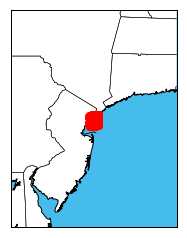

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap #conda install -c conda-forge basemap
import pandas as pd
import io

#u = u"""latitude,longitude
#42.357778,-71.059444
#39.952222,-75.163889
#25.787778,-80.224167
#30.267222, -97.763889"""

# read in data to use for plotted points
#buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = data_aux['pickup_latitude'].values 
lon = data_aux['pickup_longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)

plt.show()



Se separa la fecha y hora en campos distinto. Además se crea un nuevo campo para expresar la hora en segundos

In [6]:
import datetime as dt
#Se extrae campo fecha
data['date_pickup'] = data['pickup_datetime'].dt.date
#Se extrae campo hora
data['time_pickup'] = data['pickup_datetime'].dt.time
#Se expresa la hora en segundos
data['seconds_pickup'] = data['pickup_datetime'].dt.hour*3600 + data['pickup_datetime'].dt.minute*60 + data['pickup_datetime'].dt.second



Se realiza un muestreo del dataset original debido a que es muy grande para procesar en equipos corrientes

In [7]:
from sklearn.model_selection import train_test_split

#data['trip_duration'] = 1 #Se usa solo cuando se esta modificando el dataset de test

x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']

data, test, y_train, y_test = train_test_split(x,y,test_size=0.96, random_state=2, 
                               stratify=data[['date_pickup']])

Se crean variables adicionales para enriquecer el dataset

In [8]:
#Calculate distance between pickup and dropoff coordinates
def get_distance(df):
    coords_1 = (df.pickup_latitude, df.pickup_longitude)
    coords_2 = (df.dropoff_latitude, df.dropoff_longitude)
    distance = geopy.distance.vincenty(coords_1, coords_2).mi
    return distance

In [9]:
#Set distance (in miles) as a new field
data['distance'] = data.apply(lambda x: get_distance(x), axis=1) 

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
def get_pm(df):
    if df.seconds_pickup < 43200:
        return 0
    return 1

In [11]:
data['pm'] = data.apply(lambda x: get_pm(x), axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
#Get week day
data['week_day_pickup'] = data['pickup_datetime'].dt.dayofweek


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
def pickup_to_center(df):
    coords_center = (41.0234877,-74.5510945)
    coords_1 = (df.pickup_latitude, df.pickup_longitude)
    #coords_2 = (df.dropoff_latitude, df.dropoff_longitude)
    distance = geopy.distance.vincenty(coords_1, coords_center).mi
    #distance_2 = geopy.distance.vincenty(coords_2, coords_center).mi
    return distance

def dropoff_to_center(df):
    coords_center = (41.0234877,-74.5510945)
    #coords_1 = (df.pickup_latitude, df.pickup_longitude)
    coords_2 = (df.dropoff_latitude, df.dropoff_longitude)
    distance = geopy.distance.vincenty(coords_2, coords_center).mi
    #distance_2 = geopy.distance.vincenty(coords_2, coords_center).mi
    return distance
    

In [14]:
#Set distance to center point
data['pickup_to_center'] = data.apply(lambda x: pickup_to_center(x), axis=1) 
data['dropof_to_center'] = data.apply(lambda x: dropoff_to_center(x), axis=1) 

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
from sklearn.cluster import KMeans
seconds_pickup = data['seconds_pickup'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=0).fit(seconds_pickup)
labels = kmeans.labels_
data['seconds_pickup_cluster'] = labels


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#Analizando la media de cada time_pickup_cluster
print(data.groupby(['seconds_pickup_cluster'],)['seconds_pickup'].mean())


seconds_pickup_cluster
0    14218.962880
1    72297.166722
2    43836.214008
Name: seconds_pickup, dtype: float64


In [17]:
from sklearn.cluster import KMeans
distance = data['distance'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=0).fit(distance)
labels = kmeans.labels_
data['distance_cluster'] = labels

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#Analizando la media de cada time_pickup_cluster
print(data.groupby(['distance_cluster'],)['distance'].mean())


distance_cluster
0    0.967751
1    2.815384
2    6.095400
Name: distance, dtype: float64


In [19]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,seconds_pickup,distance,pm,week_day_pickup,pickup_to_center,dropof_to_center,seconds_pickup_cluster,distance_cluster
count,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000,56066.000000
mean,1.535387,1.658242,-73.978011,40.753486,-73.975934,40.753603,50761.949149,1.791796,0.636803,3.051903,35.369110,35.471862,1.202939,0.386473
std,0.498751,1.309656,0.024659,0.023168,0.025073,0.028676,23093.660638,1.582550,0.480925,1.950859,0.999350,1.170273,0.725243,0.625050
min,1.000000,0.000000,-74.105110,40.625256,-74.105110,40.624237,2.000000,0.000000,0.000000,0.000000,27.520678,27.520556,0.000000,0.000000
25%,1.000000,1.000000,-73.992109,40.738835,-73.991318,40.737721,34493.500000,0.752231,0.000000,1.000000,34.778327,34.795491,1.000000,0.000000
50%,2.000000,1.000000,-73.982056,40.754913,-73.980042,40.755304,53119.000000,1.255699,1.000000,3.000000,35.302068,35.327082,1.000000,0.000000
75%,2.000000,2.000000,-73.968651,40.768822,-73.964218,40.770404,70166.000000,2.230924,1.000000,5.000000,35.659896,35.714908,2.000000,1.000000
max,2.000000,6.000000,-73.821335,40.874332,-73.841042,40.879955,86397.000000,12.655824,1.000000,6.000000,43.890547,43.881140,2.000000,2.000000


In [20]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,date_pickup,time_pickup,seconds_pickup,distance,pm,week_day_pickup,pickup_to_center,dropof_to_center,seconds_pickup_cluster,distance_cluster
id,,,,,,,,,,,,,,,,,,,
id0542383,1,2016-03-03 19:56:44,2016-03-03 20:24:41,1,-73.865105,40.770500,-73.981628,40.763412,N,2016-03-03,19:56:44,71804,6.132703,1,3,39.936200,34.802908,1,2
id1178888,2,2016-06-12 19:02:29,2016-06-12 19:10:11,1,-73.952538,40.798222,-73.938591,40.794159,N,2016-06-12,19:02:29,68549,0.783242,1,6,34.977879,35.757447,1,0
id0442958,2,2016-03-08 02:58:55,2016-03-08 03:02:48,1,-73.977570,40.745468,-73.988029,40.728249,N,2016-03-08,02:58:55,10735,1.308895,0,1,35.639603,35.844131,0,0
id3908730,1,2016-05-02 19:04:02,2016-05-02 19:11:25,1,-73.982811,40.759998,-73.988899,40.771870,N,2016-05-02,19:04:02,68642,0.879228,1,0,34.872770,34.175526,1,0
id0014907,2,2016-04-09 23:55:57,2016-04-09 23:59:49,2,-73.985542,40.757511,-73.994949,40.760319,N,2016-04-09,23:55:57,86157,0.530240,1,5,34.841375,34.320218,1,0


In [21]:
pandas_profiling.ProfileReport(data)

Number of variables,20
Number of observations,56066
Total Missing (%),0.0%
Total size in memory,8.1 MiB
Average record size in memory,152.0 B
Numeric,11
Categorical,4
Boolean,2
Date,1
Text (Unique),1
Rejected,1


In [28]:
data.to_csv('data/train_enriched.csv') #Para guardar dataset enriquecido de entreanmiento
#data.to_csv('data/test_enriched.csv') #Para guardar dataset enriquecido de test